In [583]:
# Importing libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

# import warnings
# warnings.simplefilter('ignore')

### Question 1: Statistical learning

### Question 2: MACHINE LEARNING

In [584]:
# https://medium.com/chinmaygaikwad/build-and-visualize-a-simple-decision-tree-using-sklearn-and-graphviz-84bda6b6b894
# 2.3 Consider the challenge of classifying the likelihood of survival using the Titanic dataset.
# Construct a decision tree and display the structure of this tree using a graphic.

# LOADING THE TITANIC DATA & EXTRACTING (age, sex, pclass, survived)
titanic = pd.read_csv('titanic3.csv')
titanic = titanic[['age','sex','pclass','survived']]


# Imputing missing values using mean
meanAge = titanic['age'].mean()                  # CALCULATING THE MEAN AGE
titanicNoNaN = titanic.fillna(meanAge)           # FILLING NAN VALUES - BCZ ONLY AGE COLUMN HAS NANS - USE THE WHOLE DATASET


# TRANSFORMING sex CATEGORIES INTO NUMERICAL VALUES
# Fit label encoder and return encoded labels: MAKING females:0 and males:1
titanicNoNaN['sex'] = LabelEncoder().fit_transform(titanicNoNaN['sex'])

x = titanicNoNaN[['age','sex','pclass']]
y = titanicNoNaN['survived']

In [585]:
# FITTING A CLASSIFICATION MODEL USING DecisionTreeClassifier
dTree = tree.DecisionTreeClassifier(random_state = 0)     # MODEL
dTree.fit(x, y)                                           # TRAINING IT

DecisionTreeClassifier(random_state=0)

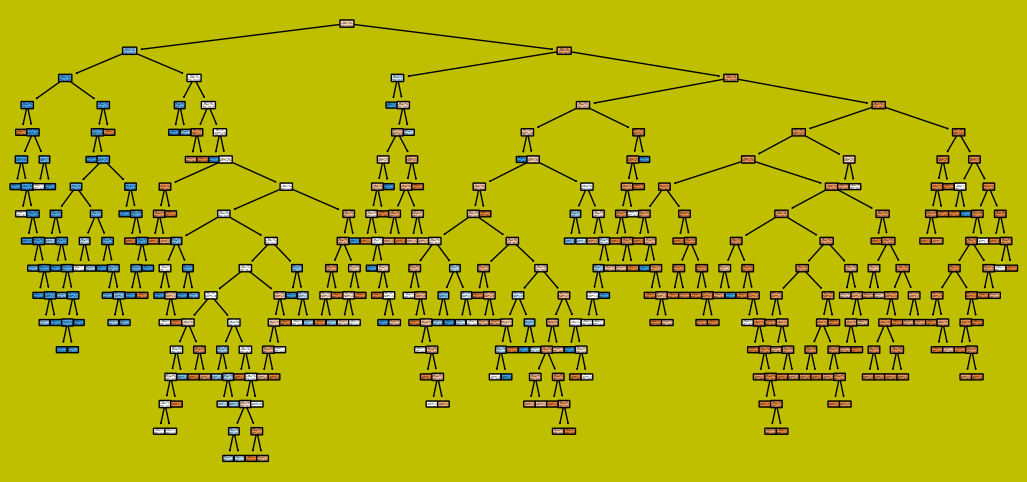

In [586]:
# Plotting the tree in graph mode - tree from SKLEARN
plt.rcParams['figure.figsize'] = (13, 6)
# tree.plot_tree(dTree, max_depth=4, filled = True, rounded = True, feature_names = x.columns, class_names=['Female', "Male"])
tree.plot_tree(dTree, filled = True, rounded = True, feature_names = x.columns, class_names=['Female', "Male"])

plt.show()

In [587]:
# https://www.w3schools.com/python/trypython.asp?filename=demo_ml_k-fold
# https://www.askpython.com/python/examples/k-fold-cross-validation
# FINDING THE MISCLASSIFICATION ERRORS OF THE TREE USING CROSS-VALIDATION AND IN-SAMPLE TECHNIQUES - cross_validation, kfold 
cvScores = cross_val_score(dTree, x, y, cv = KFold(n_splits = 10, random_state = 1, shuffle = True))

print("Cross Validation Scores:", cvScores)
print("Average CV Score:", cvScores.mean())
print("Number of CV Scores used in Average:", len(cvScores))

Cross Validation Scores: [0.82442748 0.71755725 0.74045802 0.7480916  0.77862595 0.74045802
 0.84732824 0.77862595 0.78625954 0.71538462]
Average CV Score: 0.7677216676453318
Number of CV Scores used in Average: 10


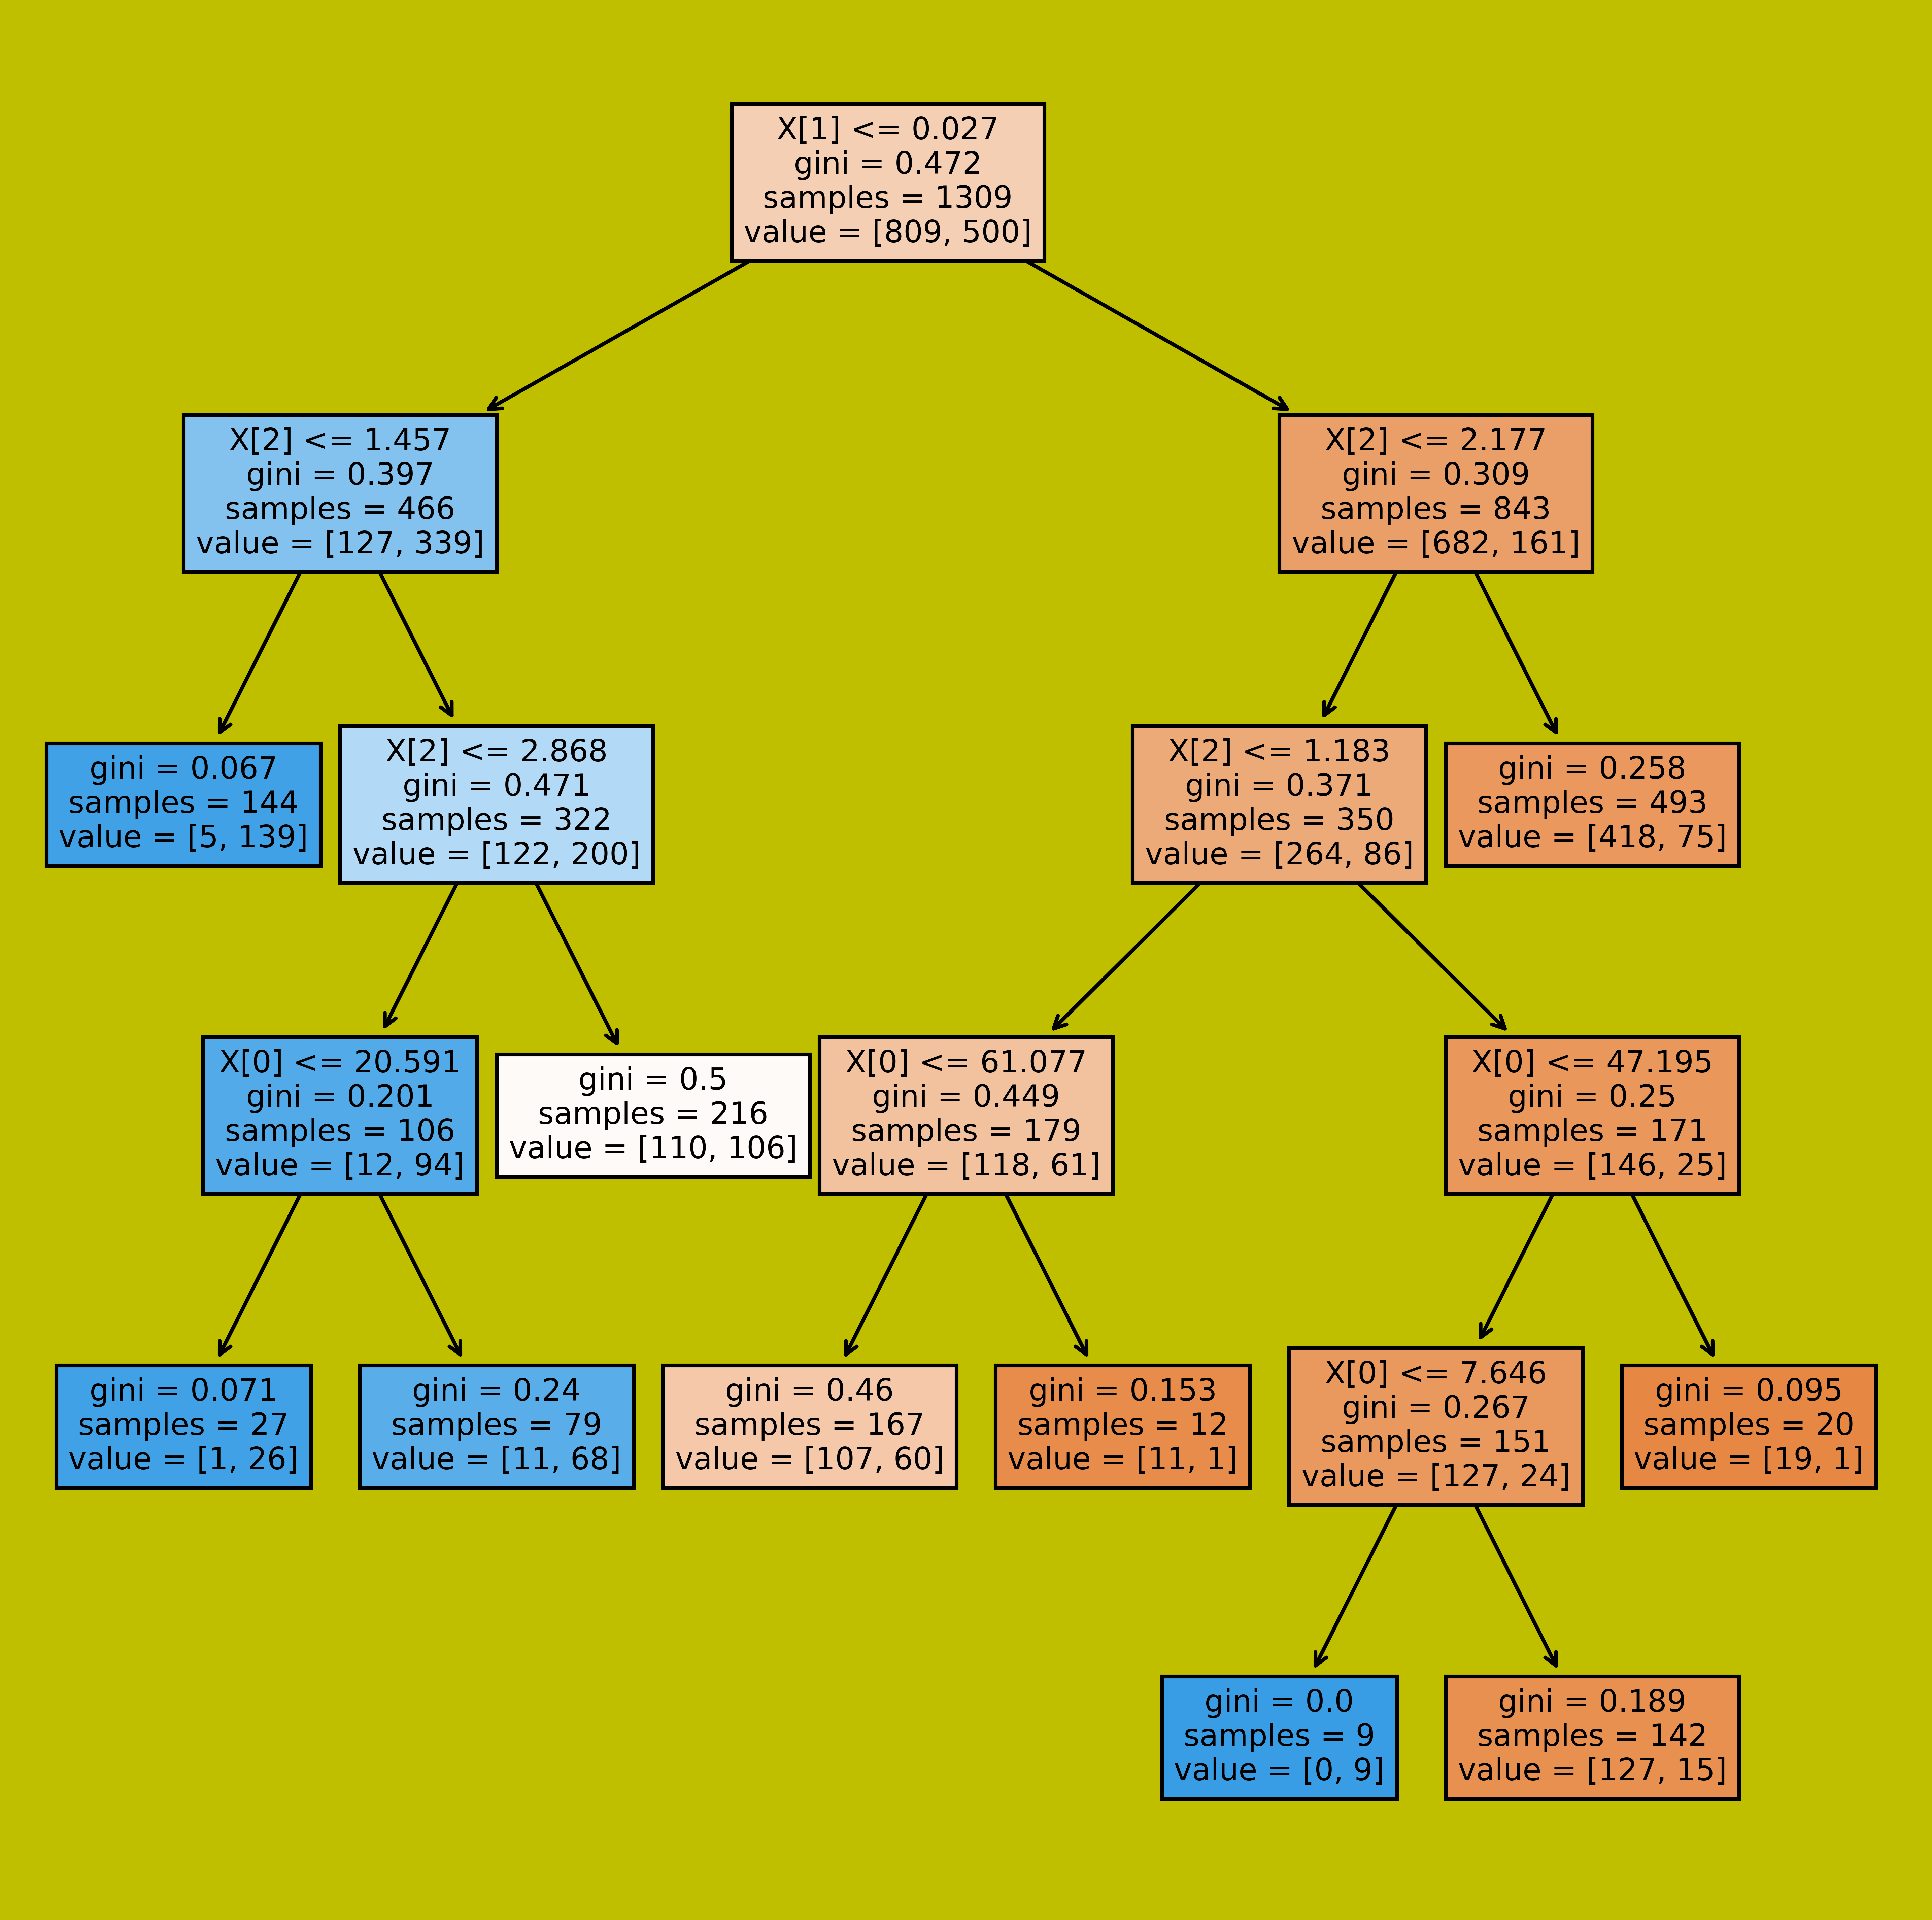

In [588]:
# 2.4. Evaluate the performance of the tree (before and after pruning) and provide results using cross-validation
# PRUNING - Simplify a Decision Tree with an Optimal Maximum Depth
# Computing the best pruning level and prune the tree with it
dTreePruned = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
dTreePruned.fit(x, y)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (9,9), dpi=800)
tree.plot_tree(dTreePruned, filled=True)
plt.show()

In [589]:
# 2.5. Compare the final tree with logistic regression and comment on the advantages and
# disadvantages of both. Which model is best for competing in the Kaggle competition? (5)
# Computing the misclassification errors after pruning
# https://github.com/krishnaik06/Post_Pruning_DecisionTre/blob/master/plot_cost_complexity_pruning.ipynb
cvScoresPruned = cross_val_score(dTreePruned, x, y, cv = KFold(n_splits = 10, random_state = 1, shuffle = True))

print("The scores with cross validation for decision tree are", cvScoresPruned.mean())

#use k-fold CV to evaluate model
scoresP = cross_val_score(dTreePruned, x, y, scoring='neg_mean_absolute_error', cv = KFold(n_splits = 10, random_state = 1, shuffle = True), n_jobs=-1)

#view mean absolute error
print("The decision tree model's mean absolute error (MAE) is", np.mean(np.absolute(scoresP)))

The scores with cross validation for decision tree are 0.7792014092777452
The decision tree model's mean absolute error (MAE) is 0.2216030534351145


In [590]:
# Build a logistic regression model using cross validation techniques (i.e.with in-sample and out-of-sample dataset)
modelLog = LogisticRegression().fit(x, y)

# Compute the error of your logistic regression model and compare it with the decision tree classifier
accuracies = cross_val_score(modelLog, x, y, cv = 10)
meanAccuracy = accuracies.mean()

print("The scores with cross validation logistic regression are", meanAccuracy)

#use k-fold CV to evaluate model
scoresL = cross_val_score(modelLog, x, y, scoring='neg_mean_absolute_error', cv = KFold(n_splits = 10, random_state = 1, shuffle = True), n_jobs=-1)

#view mean absolute error
print("The logistic model's mean absolute error (MAE) is", np.mean(np.absolute(scoresL)))

The scores with cross validation logistic regression are 0.7532413388138579
The logistic model's mean absolute error (MAE) is 0.2147269524368761


### Question 3

Optimal k is 4 with minimum loss of 0.25142102172636527


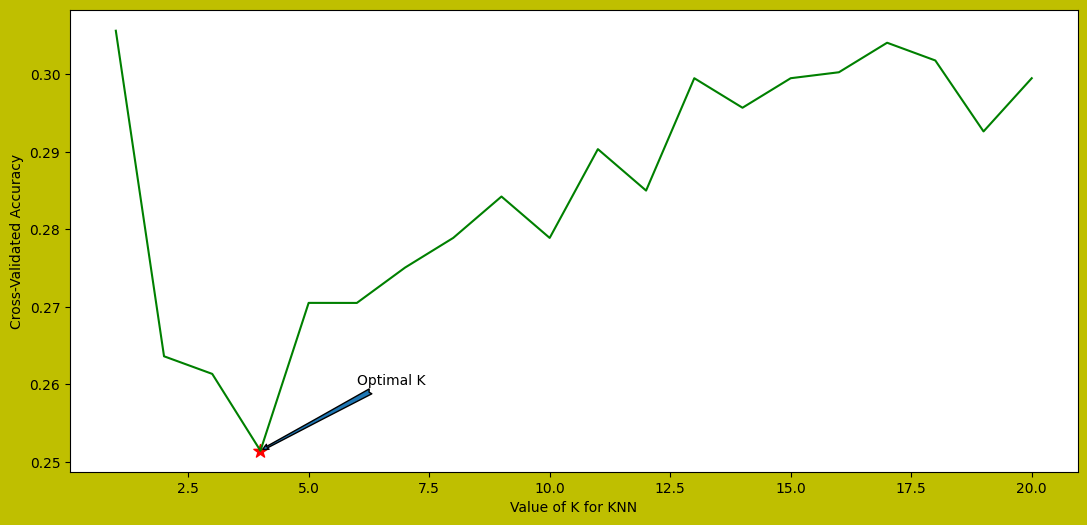

In [591]:
# https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4#:~:text=Cross%2DValidation%20in%20Sklearn%20is,parameters%20on%20the%20structural%20accuracy.&text=Basically%2C%20the%20accuracy%20from%20knn,of%20train%20and%20test%20dataset.
# 3.3 Fit a KNN classifier with default params, and evaluate the performance using resubloss, cross validation and k-fold loss.
# 3.3 Calculate the performance of the classifier versus the number of neighbors used and
# provide a graphic to display the result. What is the optimal number of neighbors using
# cross-validation? (5)
lossList = []
rangeofKs = range(1, 21) # NEIGHBORHOOD SIZE

# i) Fit the classifier and test different neighborhood size (1-10, 15, 20)
for k in rangeofKs:
    knnClassifier = KNeighborsClassifier(n_neighbors = k).fit(x, y)         # Models
    
    # ii) For each fit, compute the in-sample and cross validated loss. Keep track of these values.
    score = cross_val_score(knnClassifier, x, y, cv = 10)                   # Evaluate a score by cross-validation.
    lossList.append(1 - np.mean(score))                                     # List of losses

# iii) Identify the optimal number of neighbors using cross validation(Hint: k with minimum loss)
lessLoss = min(lossList)

optimalK = lossList.index(lessLoss) + 1
print("Optimal k is", optimalK, "with minimum loss of", lessLoss)

# iii) Plot the graph of loss against the number of k. Also show the optimal point
plt.plot(rangeofKs, lossList, color = 'green')
plt.scatter(optimalK, lessLoss, color = 'red', s = 100, marker = '*')  # Showing the break even point on the plot
plt.annotate("Optimal K", xy = (optimalK, lessLoss), xytext =(6, 0.26), arrowprops = dict(arrowstyle = "fancy", connectionstyle = "arc3"))

# Plotting: Defining figure properties
plt.rcParams['figure.facecolor'] = 'y'
plt.rcParams['figure.edgecolor'] = 'r'

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [592]:
# 3.4
# (ii) Evaluate the performance of the KNN classifier using different distance metrics.
disMetrics = ["chebyshev", "euclidean", "jaccard", "canberra", "hamming", "minkowski", "braycurtis", "manhattan"]

accuracyMetr = []

for k in disMetrics:
    kneighModel = KNeighborsClassifier(n_neighbors = 4, metric = k)
    metricScores = cross_val_score(kneighModel, x, y, cv = 10)                   # Evaluate a score by cross-validation.
    accuracyMetr.append(np.mean(metricScores))                                   # List of scores
    print("Accuracy for", k, "metric is", np.mean(metricScores))

Accuracy for chebyshev metric is 0.7012448620082207
Accuracy for euclidean metric is 0.7485789782736347
Accuracy for jaccard metric is 0.4842630651790958
Accuracy for canberra metric is 0.7722313564298297
Accuracy for hamming metric is 0.679107457428068
Accuracy for minkowski metric is 0.7485789782736347
Accuracy for braycurtis metric is 0.7241456253669994
Accuracy for manhattan metric is 0.7493423370522606


In [593]:
# 3.5 Calculate performance of both classifier using cross-validation. Fit KNN wit optimal k. Fit Logistic Regression 
knnOptimalClassifier = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean').fit(x, y)       # Fit KNN with optimal k

scoreOpt = cross_val_score(knnOptimalClassifier, x, y, cv = 10)                 # Evaluate a score by cross-validation.
meanAccuKNN = np.mean(scoreOpt)
print("The accuracy with cross validation on KNN is", meanAccuKNN)

# Fitting the Logistic Regression 
modelLogistic = LogisticRegression().fit(x, y)
accuLog = cross_val_score(modelLogistic, x, y, cv = 10)
meanAccuLog = np.mean(accuLog)
print("The accuracy with cross validation on Logistic Regression is", meanAccuLog)

The accuracy with cross validation on KNN is 0.7485789782736347
The accuracy with cross validation on Logistic Regression is 0.7532413388138579


### Question 4

In [606]:
# LOADING THE WINE DATA
redWine = pd.read_csv('winequality-white.csv', sep = ";")
whiteWine = pd.read_csv('winequality-red.csv',  sep = ";")

# 4.1 AVERAGE OF EACH FEATURE FOR RED AND WHITE WINES USING mean(). 
redWineMean = redWine.mean()
print("The mean for the red wine features is:\n")
print(redWineMean)

whiteWineMean = whiteWine.mean()
print("\n\nThe mean for the white wine features is:\n")
print(whiteWineMean)

The mean for the red wine features is:

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64


The mean for the white wine features is:

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64


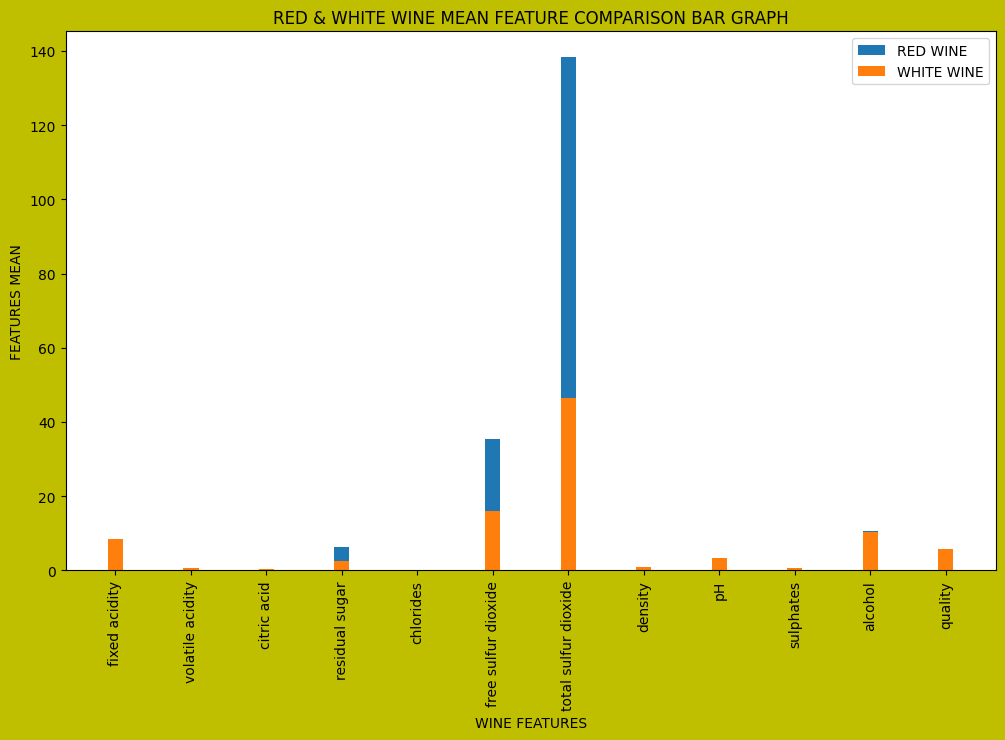

In [611]:
# PLOTTING THE BAR GRAPH TO SHOW COMPARISON
plt.title('RED & WHITE WINE MEAN FEATURE COMPARISON BAR GRAPH', fontsize = 12)
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['figure.facecolor'] = 'y'
plt.rcParams['figure.edgecolor'] = 'r'

plt.xlabel("WINE FEATURES")
plt.ylabel("FEATURES MEAN")
plt.bar(redWineMean.index, redWineMean, width = 0.2, label = "RED WINE")
plt.bar(whiteWineMean.index, whiteWineMean, width = 0.2, label = "WHITE WINE")
plt.xticks(redWineMean.index, rotation = 90)
plt.legend()
plt.show()

In [613]:
# 4.2 CORRELATION FOR ALL FEATURES WITH quality AND INDENTIFY THE MOST
# CORRELATION COEFFICIENT FOR RED WINE AND RELEVANT FEATURE BASED ON THE CORR VALUES
xRed = redWine[["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]]
yRed = redWine[["quality"]]
xRedQuality = xRed.corr()["quality"]
print("The correlation for red wine is:\n")
print(xRedQuality)

print("\nThe relevant feature is alcohol with correlation of", xRedQuality['alcohol'])

The correlation for red wine is:

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

The relevant feature is alcohol with correlation of 0.4355747154613733


In [597]:
# 4.2 Calculate correlation of these features with the dependent variable and identify the most
# relevant feature based on the correlation values. 

# CORRELATION COEFFICIENT FOR WHITE WINE AND RELEVANT FEATURE BASED ON THE CORR VALUES 
xWhite = whiteWine[["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]]
yWhite = whiteWine[["quality"]]

xWhiteQuality = xWhite.corr()["quality"]
print("The correlation for red wine is:\n")
print(xWhiteQuality)

print("\nThe relevant feature is alcohol with correlation of", xWhiteQuality['alcohol'])

The correlation for red wine is:
fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

The relevant feature is alcohol with correlation of 0.47616632400113656


In [614]:
# 4.3 Using Lasso and CV to provide a plot of MSE for each wine type. # Providing a plot of parameter estimates versus lambda. 
# Hint - lasso() & lassoPlot() functions. # Explain how the features were selected by LASSO. 
lassoAlphas = np.arange(0.0, 1.0, 0.01)
redMSEs = []
lassoRedEstimates = []

whiteMSEs = []
lassoWhiteEstimates = []

for lal in lassoAlphas:
    lassoModel = Lasso(alpha = lal)
    lassoCoef = lassoModel.fit(xRed, yRed).coef_
    lassoRedEstimates.append(lassoCoef)
    
    mse = cross_val_score(lassoModel, xRed, yRed, cv = 10, scoring = "neg_mean_squared_error")
    
    meanMSE = np.mean(np.abs(mse))
    redMSEs.append(meanMSE)
    

for lal in lassoAlphas:
    lassoModel = Lasso(alpha = lal)
    lassoCoef = lassoModel.fit(xWhite, yWhite).coef_
    lassoWhiteEstimates.append(lassoCoef)
    
    mse = cross_val_score(lassoModel, xWhite, yWhite, cv = 10, scoring = "neg_mean_squared_error")
    
    meanMSE = np.mean(np.abs(mse))
    whiteMSEs.append(meanMSE)

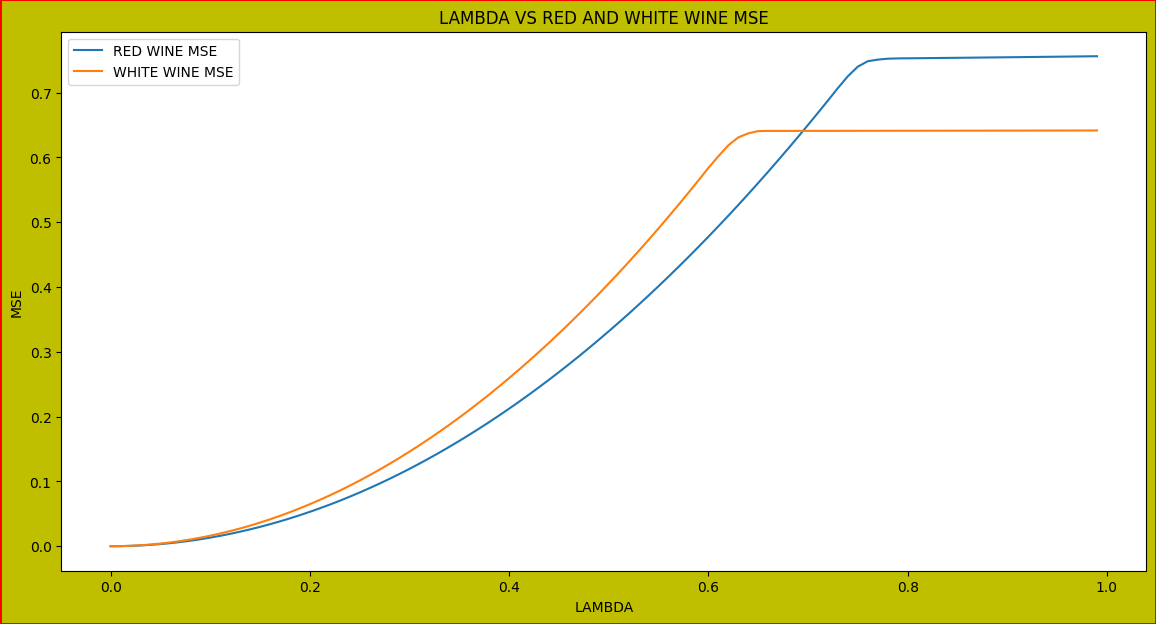

In [617]:
# Plotting: Defining figure properties
plt.figure(figsize = (14, 7), edgecolor = 'r', facecolor = 'y', linewidth = 1)

# Plotting
plt.plot(lassoAlphas, redMSEs, label = "RED WINE MSE")
plt.plot(lassoAlphas, whiteMSEs, label = "WHITE WINE MSE")

# Adding the title and labels to the plot
plt.title("LAMBDA VS RED AND WHITE WINE MSE")
plt.xlabel("LAMBDA")
plt.ylabel("MSE")
plt.legend()

# Showing the plot
plt.show()

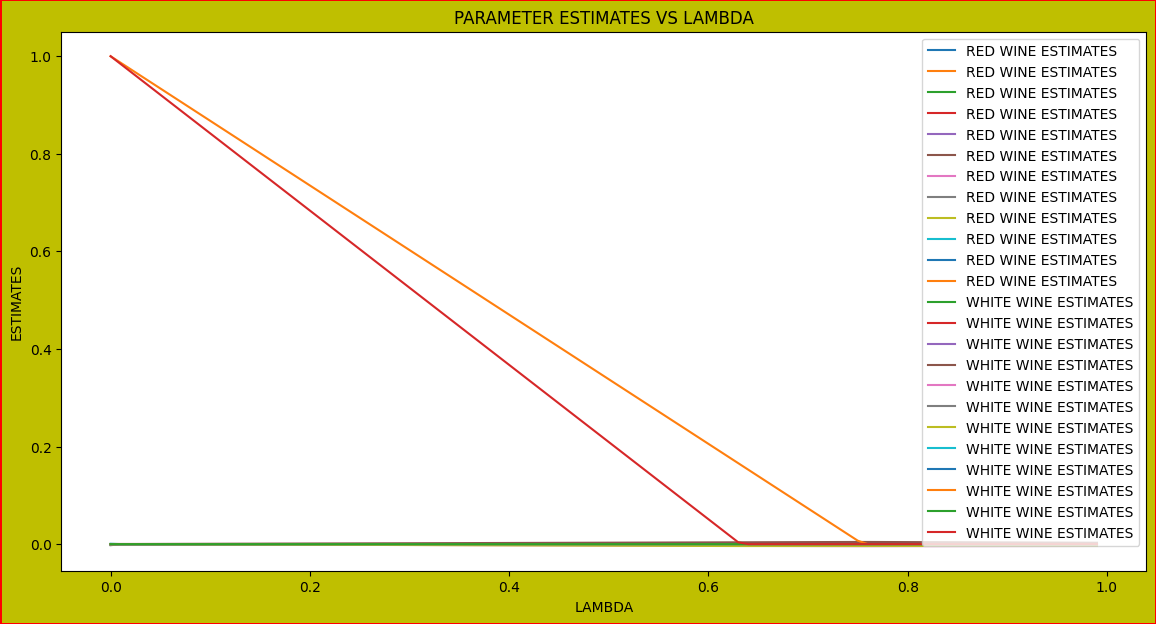

In [620]:
# GRAPH FOR ESTIMATES
# Plotting: Defining figure properties
plt.figure(figsize = (14, 7), edgecolor = 'r', facecolor = 'y', linewidth = 1)

# Adding the title and labels to the plot
plt.title("PARAMETER ESTIMATES VS LAMBDA")
plt.xlabel("LAMBDA")
plt.ylabel("ESTIMATES")

# Plotting
plt.plot(lassoAlphas, lassoRedEstimates, label = "RED WINE ESTIMATES")
plt.plot(lassoAlphas, lassoWhiteEstimates, label = "WHITE WINE ESTIMATES")

# Showing the plot
plt.legend()
plt.show()

In [600]:
# 4.4 Use the features identified by LASSO to construct a KNN regression model for the red wine.
regrModel = Lasso().fit(xRed, yRed)
coefs = regrModel.coef_
feats = regrModel.feature_names_in_

for i in range(len(coefs)):
    print(feats[i], ":", coefs[i])

fixed acidity : -0.0
volatile acidity : -0.0
citric acid : 0.0
residual sugar : -0.0
chlorides : -0.0
free sulfur dioxide : 0.0027619624926357835
total sulfur dioxide : -0.003767952891086156
density : -0.0
pH : 0.0
sulphates : 0.0
alcohol : 0.0
quality : 0.0


In [601]:
# USING SEELECTED FEATURES - free sulfur dioxide AND total sulfur dioxide
xRedSelected = xRed[[ "free sulfur dioxide", "total sulfur dioxide"]]
knnModel = KNeighborsClassifier().fit(xRedSelected, yRed)         # Model
predKNN = knnModel.predict(xRedSelected)

LinRegrModel = LinearRegression().fit(xRedSelected, yRed)        # BUILDING AND FITTING A REGRESSION MODEL
predLin = LinRegrModel.predict(xRedSelected)

In [602]:
# 4.5 Choose between linear regression model and KNN model, the model that performs better
# based on MSE and R2 values. Describe the advantages and disadvantages of both models. 
mseKNN = cross_val_score(knnModel, xRedSelected, yRed, cv = 10, scoring = "neg_mean_squared_error")
mseLin = cross_val_score(LinRegrModel, xRedSelected, yRed, cv = 10, scoring = "neg_mean_squared_error")

print("The MSE for KNN wine is", np.mean(mseKNN))
print("The MSE for Linear Model wine is", np.mean(mseLin))

print("\nThe R squared for KNN wine is", r2_score(yRed, predKNN))
print("The R squared for Linear Model wine is", r2_score(yRed, predLin))

# Linear has less errors
# 

The MSE for KNN wine is -1.1867922874671342
The MSE for Linear Model wine is -0.7468065971070367

The R squared for KNN wine is 0.04764131166000318
The R squared for Linear Model wine is 0.0520872875239865
